Nama : Hari Pringadi

Data yang digunakan [<em>Cardiovascular Diseases Risk Prediction Dataset</em>](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/code)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Import necessary libraries for 3D plotting
from sklearn.preprocessing import LabelEncoder

In [2]:
# kaggle API
os.environ['KAGGLE_USERNAME'] = "haripringadi"
os.environ['KAGGLE_KEY'] = "35ccb8444be58525a22963e75901b2aa"

In [3]:
# download datasets
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset --path '/content' --unzip

  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 191MB/s]


# Data Understanding

In [4]:
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 308854 records and 19 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [7]:
print('Total missing value in the dataframe:', df.isnull().sum().sum(), 'records')

Total missing value in the dataframe: 0 records


## Analisis Univariat

Periksa distribusi fitur numerik

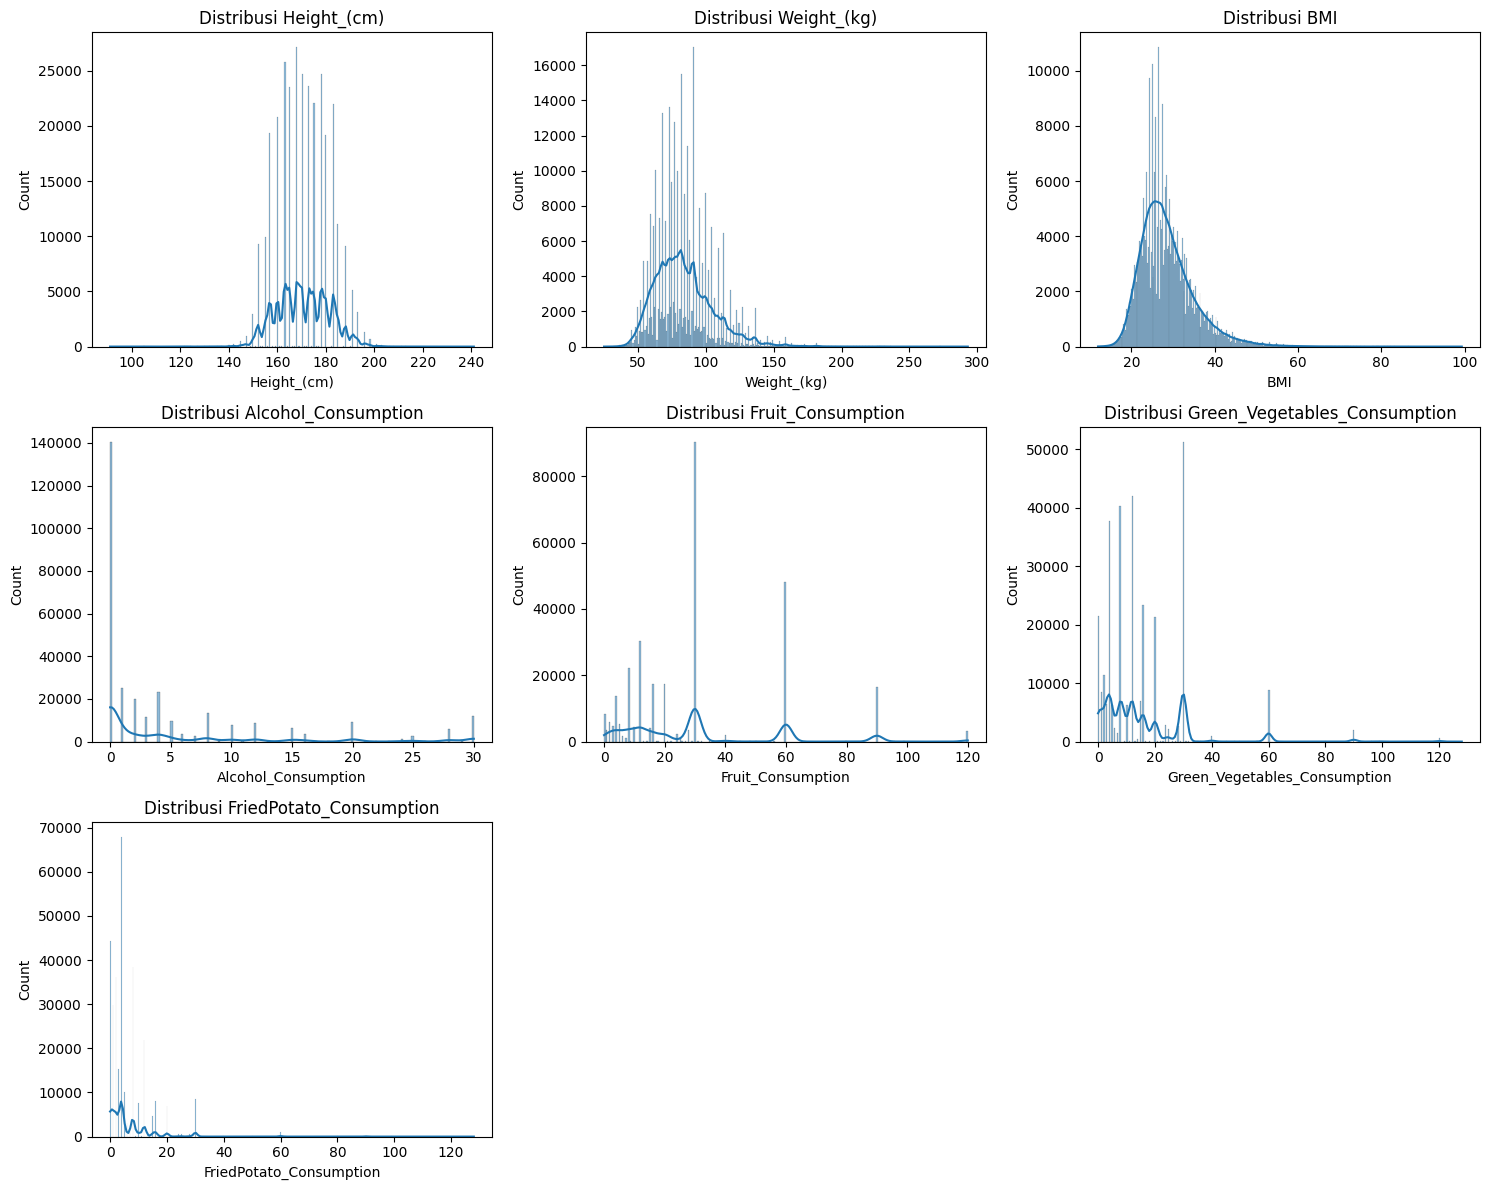

In [8]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

num_plots_per_row = 3
num_rows = (len(numerical_features) - 1) // num_plots_per_row + 1

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))

for i, feature in enumerate(numerical_features):
    row = i // num_plots_per_row
    col = i % num_plots_per_row

    sns.histplot(data=df, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title('Distribusi ' + feature)

# Hapus semua subplot kosong
for i in range(len(numerical_features), num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Periksa distribusi fitur kategorikal

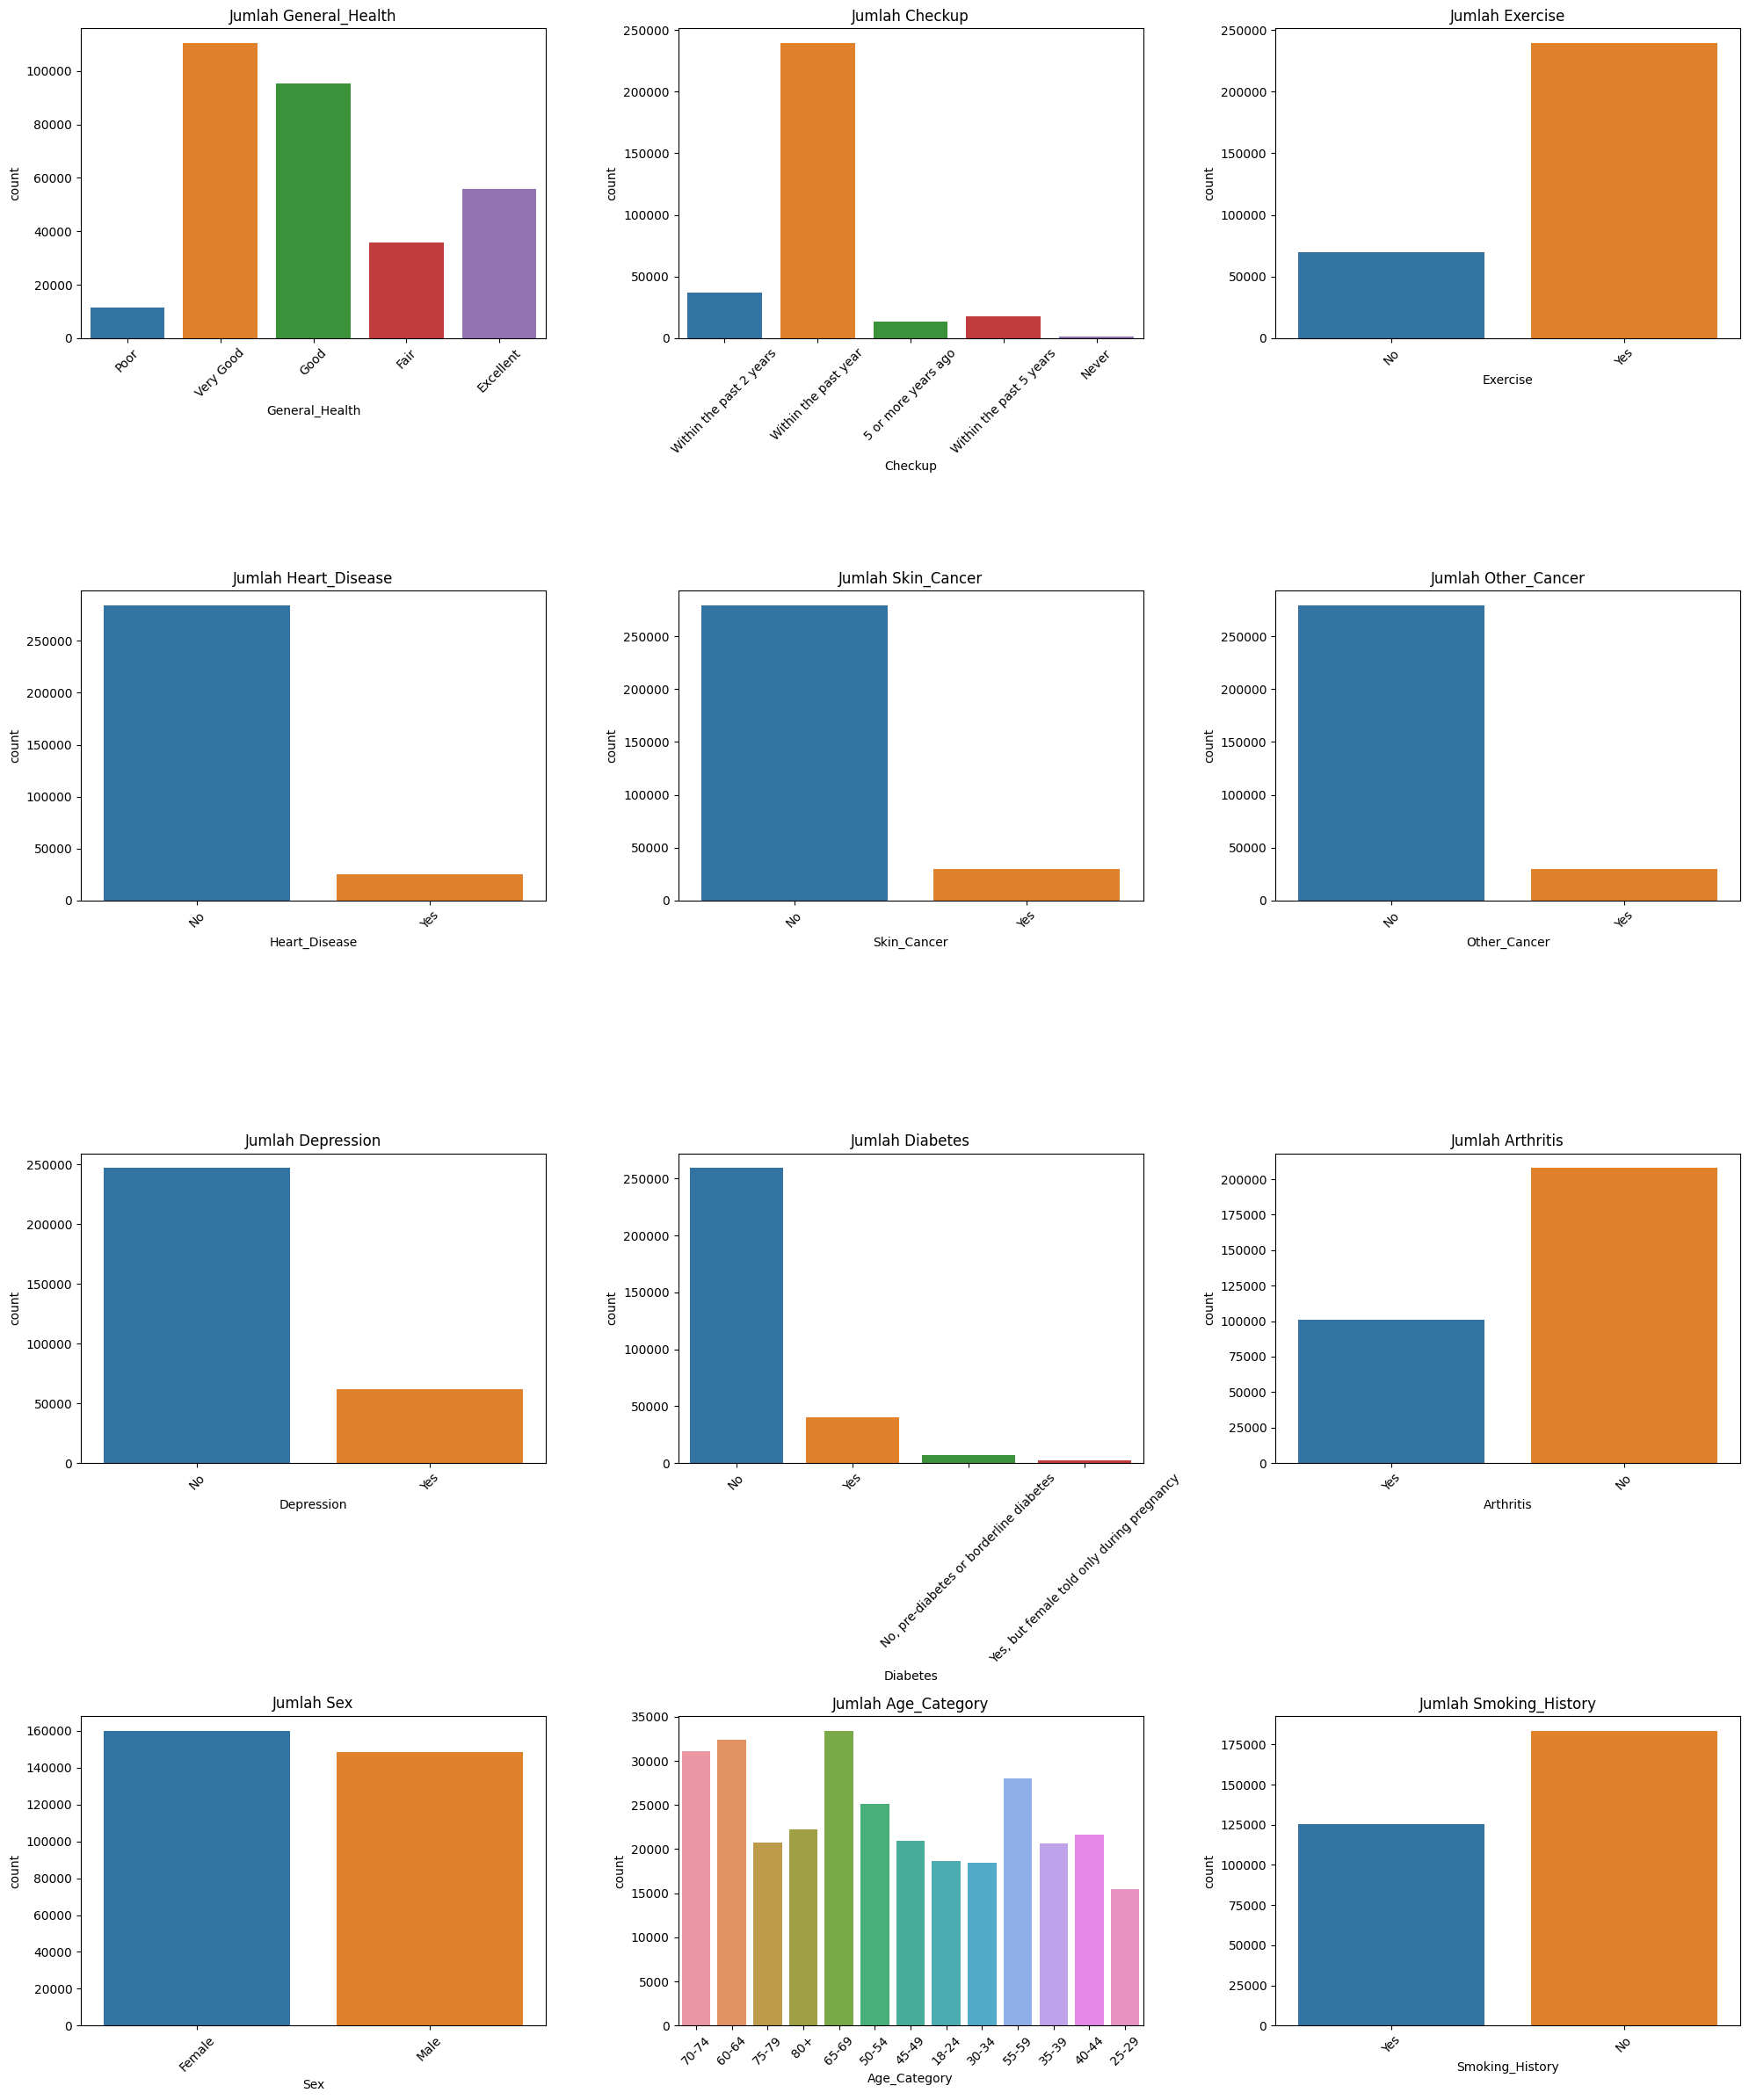

In [9]:
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

num_plots_per_row = 3
num_rows = (len(categorical_features) - 1) // num_plots_per_row + 1

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 6*num_rows))

for i, feature in enumerate(categorical_features):
    row = i // num_plots_per_row
    col = i % num_plots_per_row

    sns.countplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title('Jumlah ' + feature)
    axes[row, col].tick_params(axis='x', rotation=45)

for i in range(len(categorical_features), num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Analisis Bivariat

 Menganalisis hubungan antara kondisi penyakit dan beberapa variabel terpilih

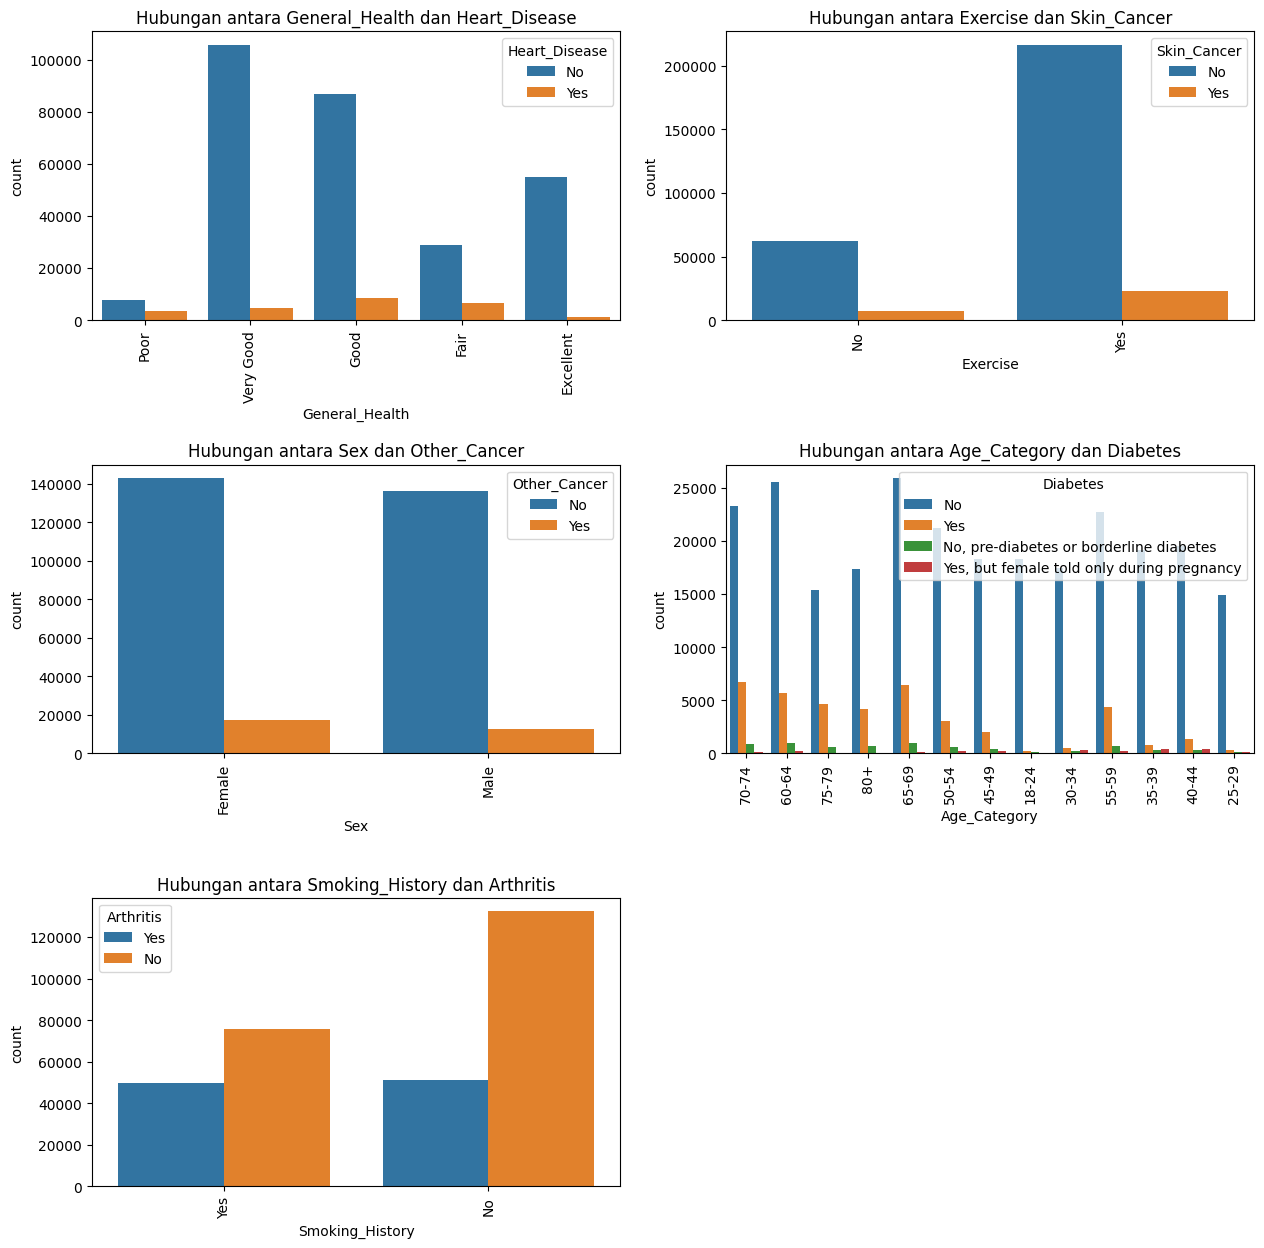

In [10]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']
disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

num_diseases = len(disease_conditions)
num_variables = len(selected_variables)
num_cols = 2
num_rows = (min(num_diseases, num_variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < min(num_diseases, num_variables):
            disease = disease_conditions[i * num_cols + j]
            variable = selected_variables[i * num_cols + j]

            ax = axes[i, j]
            sns.countplot(data=df, x=variable, hue=disease, ax=ax)
            ax.set_title('Hubungan antara ' + variable + ' dan ' + disease)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        else:
            fig.delaxes(axes[i, j])

plt.show()

## Analisis Multivariat

Menganalisis hubungan antara kondisi penyakit, kesehatan umum, dan kategori usia

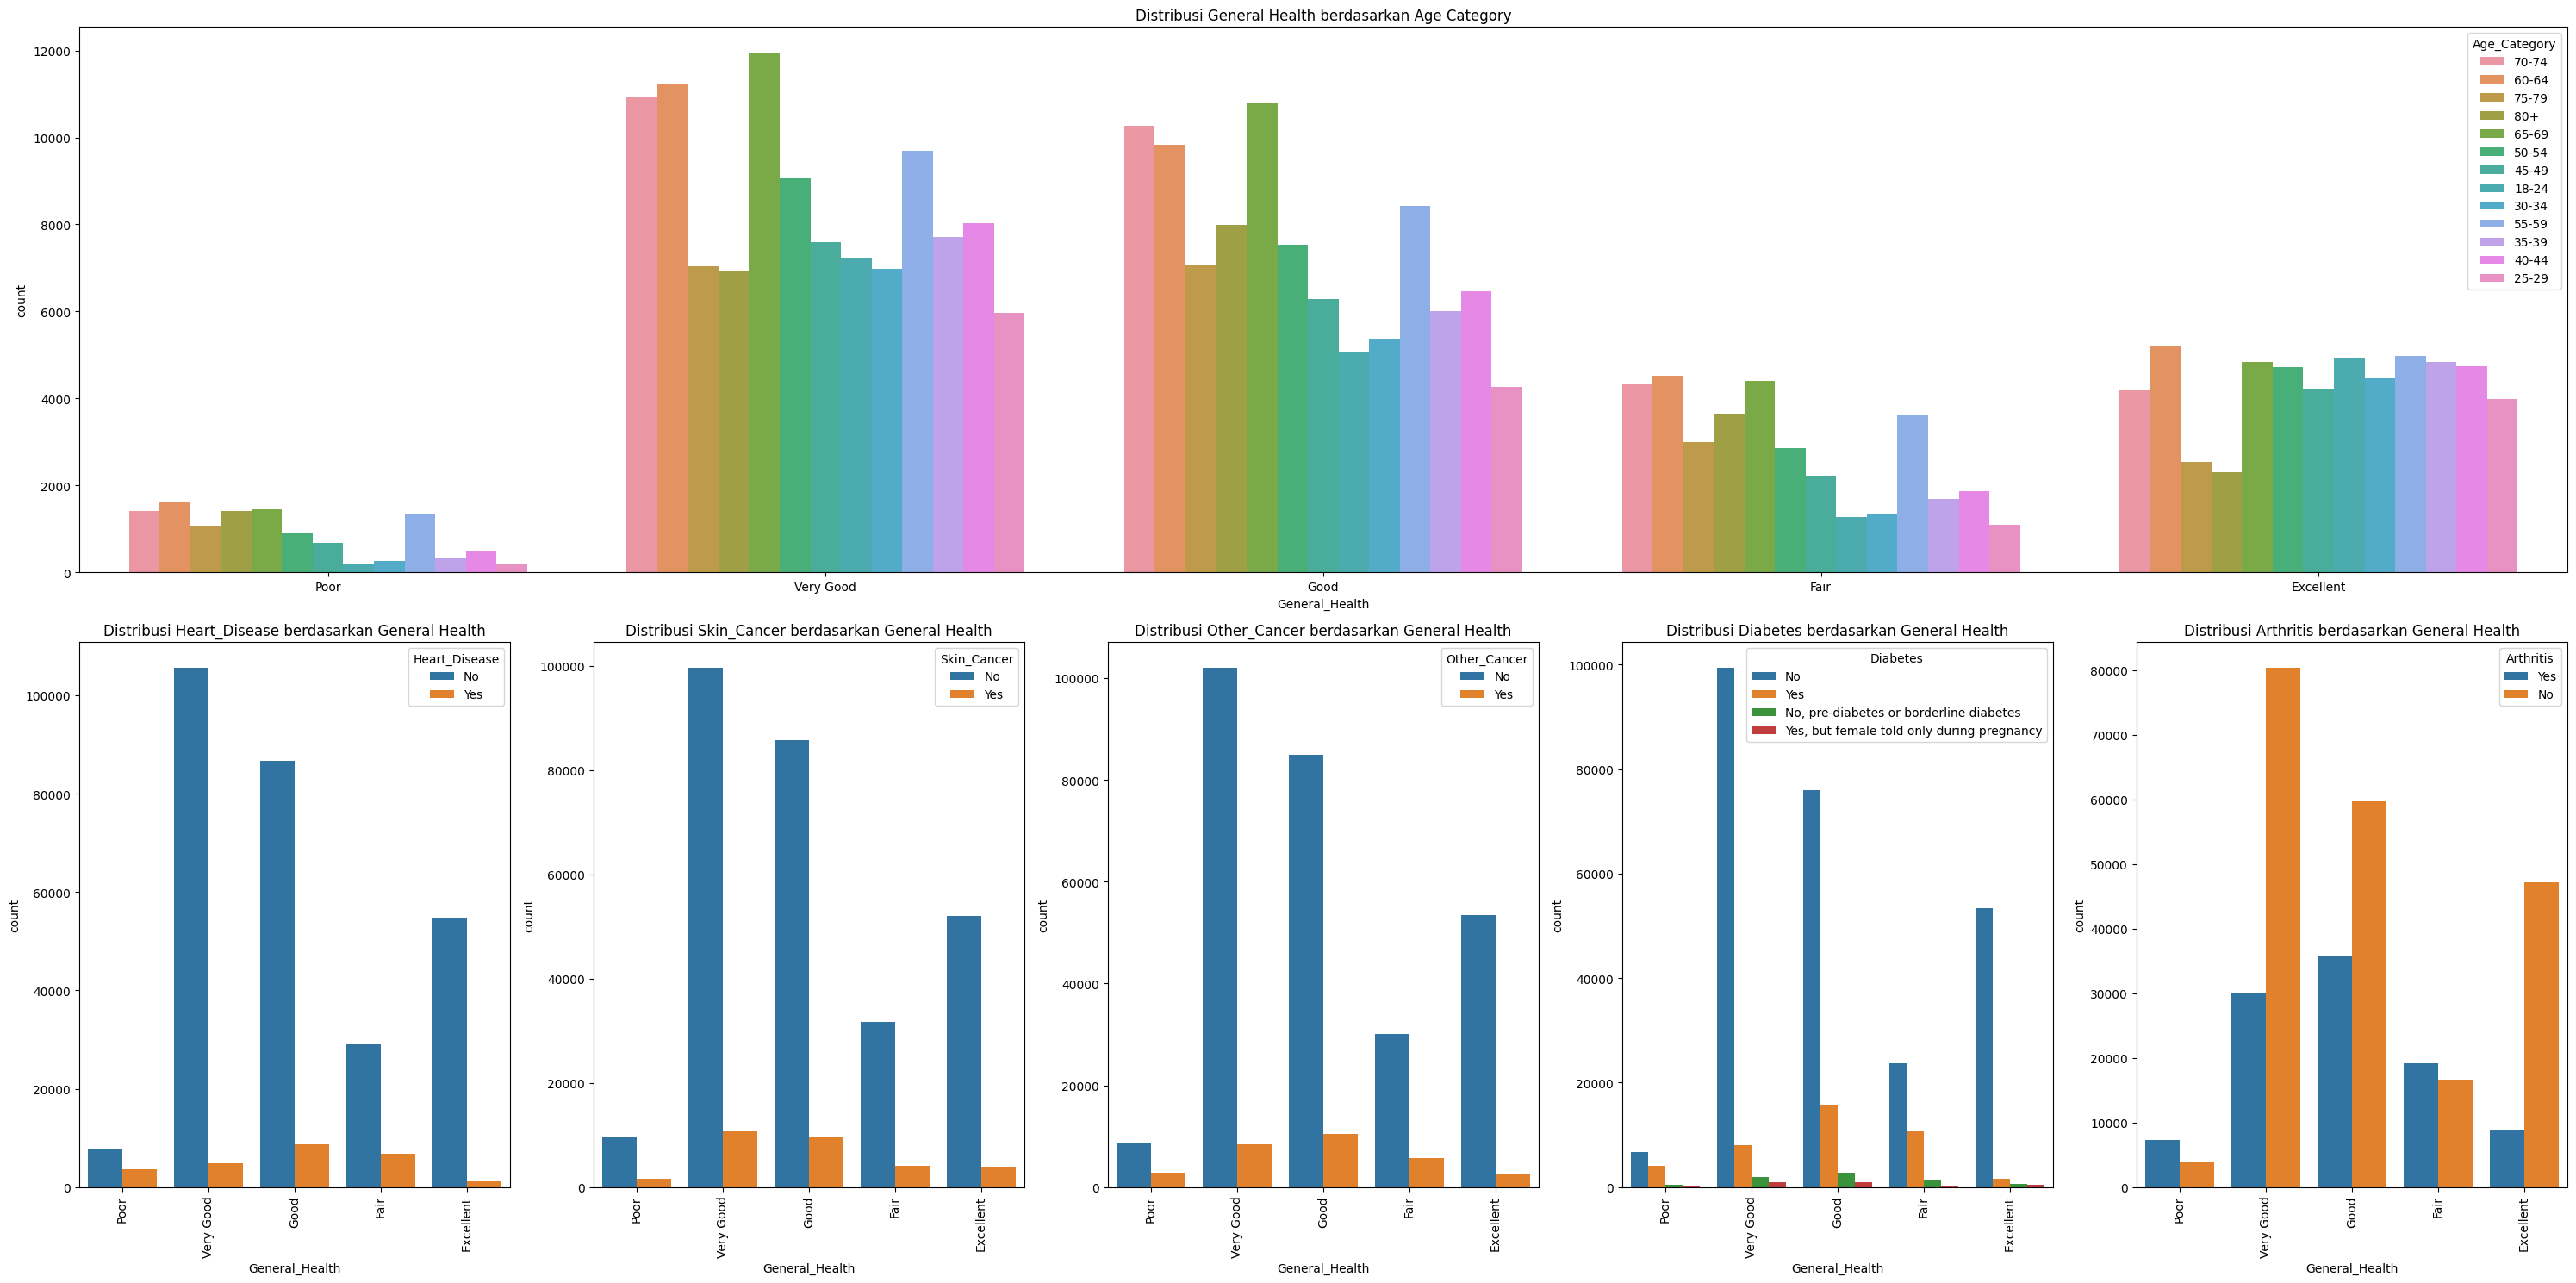

In [11]:
plt.figure(figsize=(30, 15))

# Plot subplot pertama: Distribusi General Health berdasarkan Age Category
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='General_Health', hue='Age_Category')
plt.title('Distribusi General Health berdasarkan Age Category')

# Plot subplot yang tersisa untuk setiap kondisi penyakit
num_diseases = len(disease_conditions)
for i, disease in enumerate(disease_conditions, 1):
    plt.subplot(2, num_diseases, num_diseases + i)
    sns.countplot(data=df, x='General_Health', hue=disease)
    plt.title('Distribusi ' + disease + ' berdasarkan General Health')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Menganalisis hubungan antara kondisi penyakit, BMI, dan olahraga

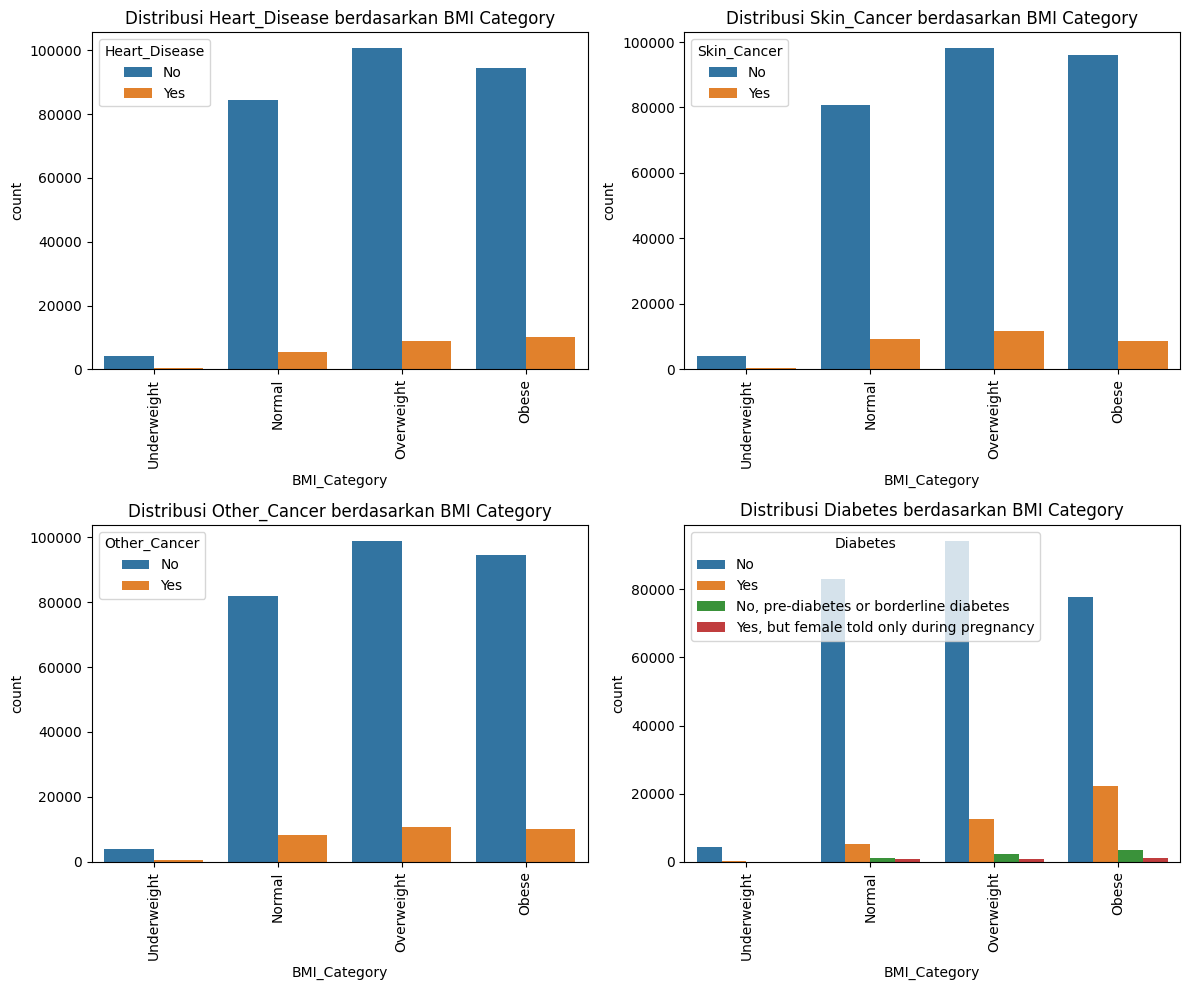

In [12]:
# Membuat kategori BMI baru
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

diseases_to_plot = disease_conditions[:4]

for idx, disease in enumerate(diseases_to_plot):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.countplot(data=df, x='BMI_Category', hue=disease, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title('Distribusi ' + disease + ' berdasarkan BMI Category')
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [13]:
df = pd.read_csv('CVD_cleaned.csv')

Mapping untuk Diabetes

In [14]:
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

# One-hot encoding untuk Sex
df = pd.get_dummies(df, columns=['Sex'])

# Ubah variabel kategori yang tersisa dengan nilai "Yes" dan "No" ke format biner untuk perhitungan korelasi
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding untuk General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
df['Checkup'] = df['Checkup'].map(checkup_mapping)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)

# Tampilkan beberapa baris pertama dari kumpulan df yang dibersihkan
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


Hapus baris duplikat

In [15]:
df = df.drop_duplicates()

Hitung correlation matrix

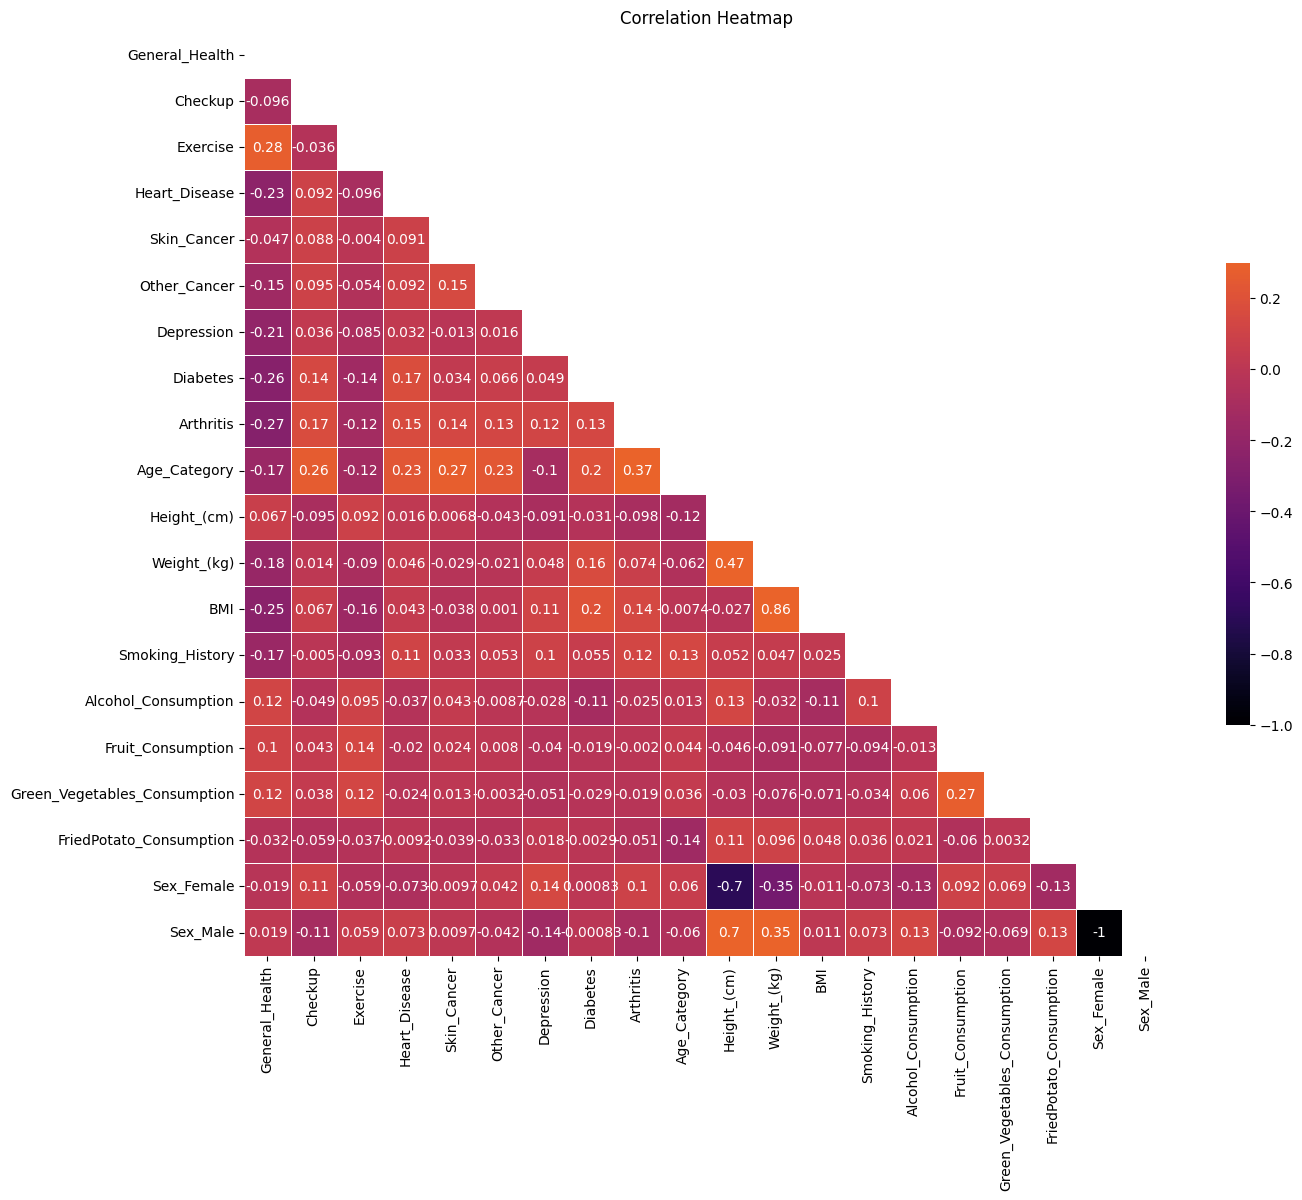

In [16]:
corr = df.corr()

# Hasilkan mask untuk upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr, mask=mask, cmap='inferno', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

Hitung korelasi setiap fitur dengan variabel penyakit

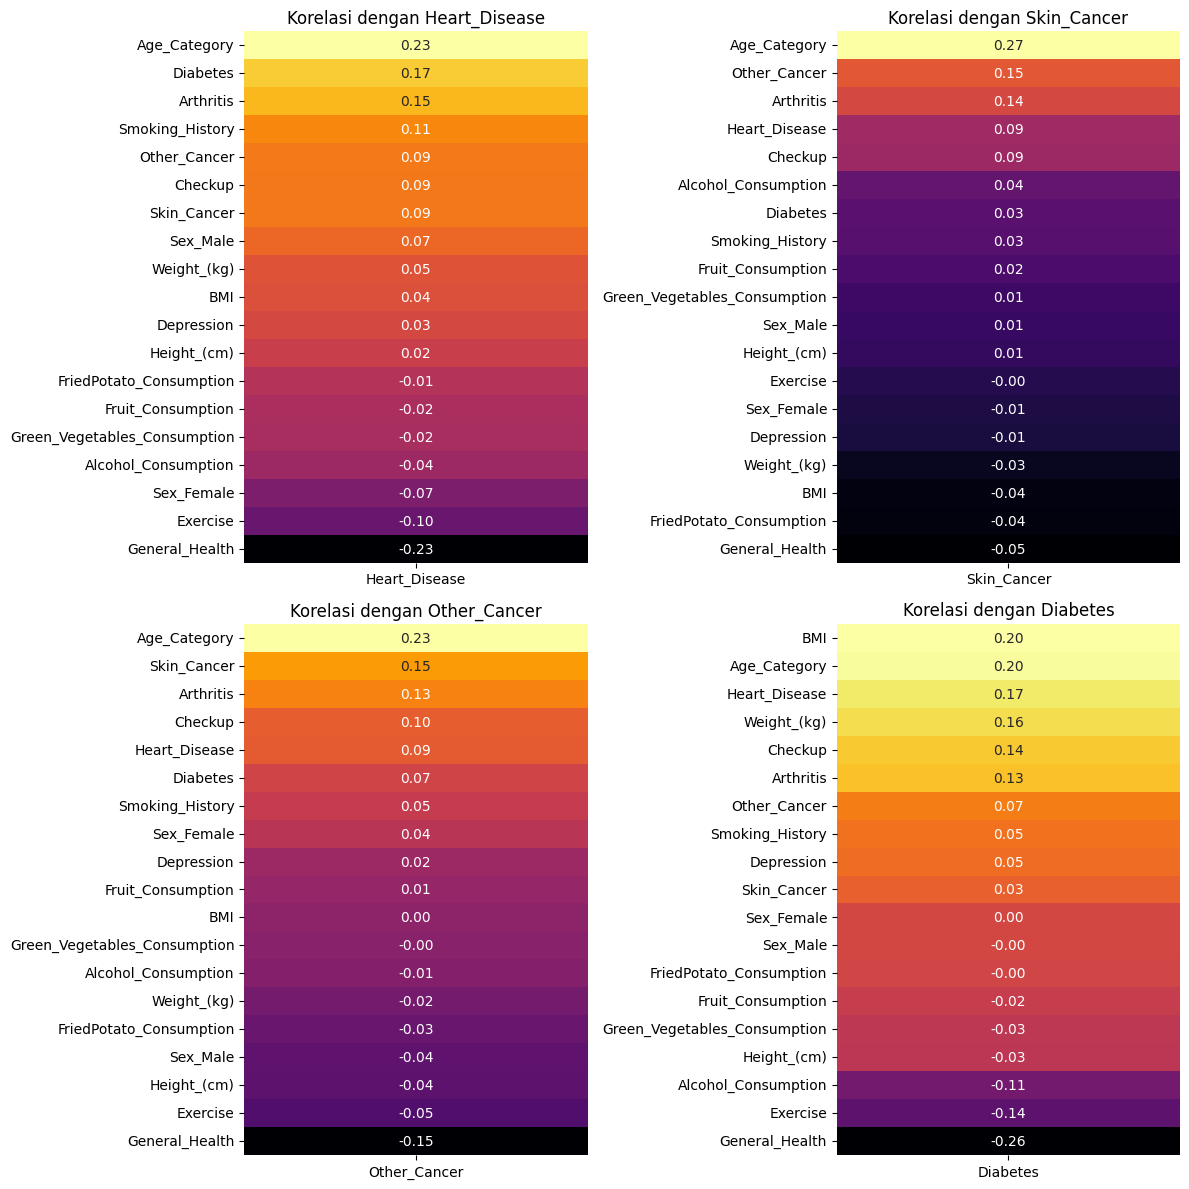

In [17]:
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Hitung correlation matrix
corr = df.corr()

num_rows = (len(disease_variables) - 1) // 2 + 1

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

for i, disease in enumerate(disease_variables):
    row = i // 2
    col = i % 2

    target_corr = corr[disease].drop(disease)

    target_corr_sorted = target_corr.sort_values(ascending=False)

    sns.heatmap(target_corr_sorted.to_frame(), cmap="inferno", annot=True, fmt='.2f', cbar=False, ax=axs[row, col])
    axs[row, col].set_title('Korelasi dengan ' + disease)

for i in range(len(disease_variables), num_rows * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

# Data Preparation

In [18]:
df = pd.read_csv('CVD_cleaned.csv')

Periksa missing value di setiap kolom

In [19]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

Membuat kolom numerik dan kategorikal

In [20]:
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

# Mencetak panjang numerik dan kategorikal. Panjang total seharusnya
# panjang yang sama dengan kerangka data kami
print(f'Ada {len(categorical)} variabel kategorikal')
print(f'Ada {len(numerical)} variabel numerikal')

Ada 12 variabel kategorikal
Ada 7 variabel numerikal


Melihat jumlah target fitur

In [21]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


0    283883
1     24971
Name: Heart_Disease, dtype: int64


### Outliers

Daftar kolom numerik

In [22]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                  'Fruit_Consumption', 'Green_Vegetables_Consumption',
                  'FriedPotato_Consumption']

 # Ringkasan statistik
summary_stats = df[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


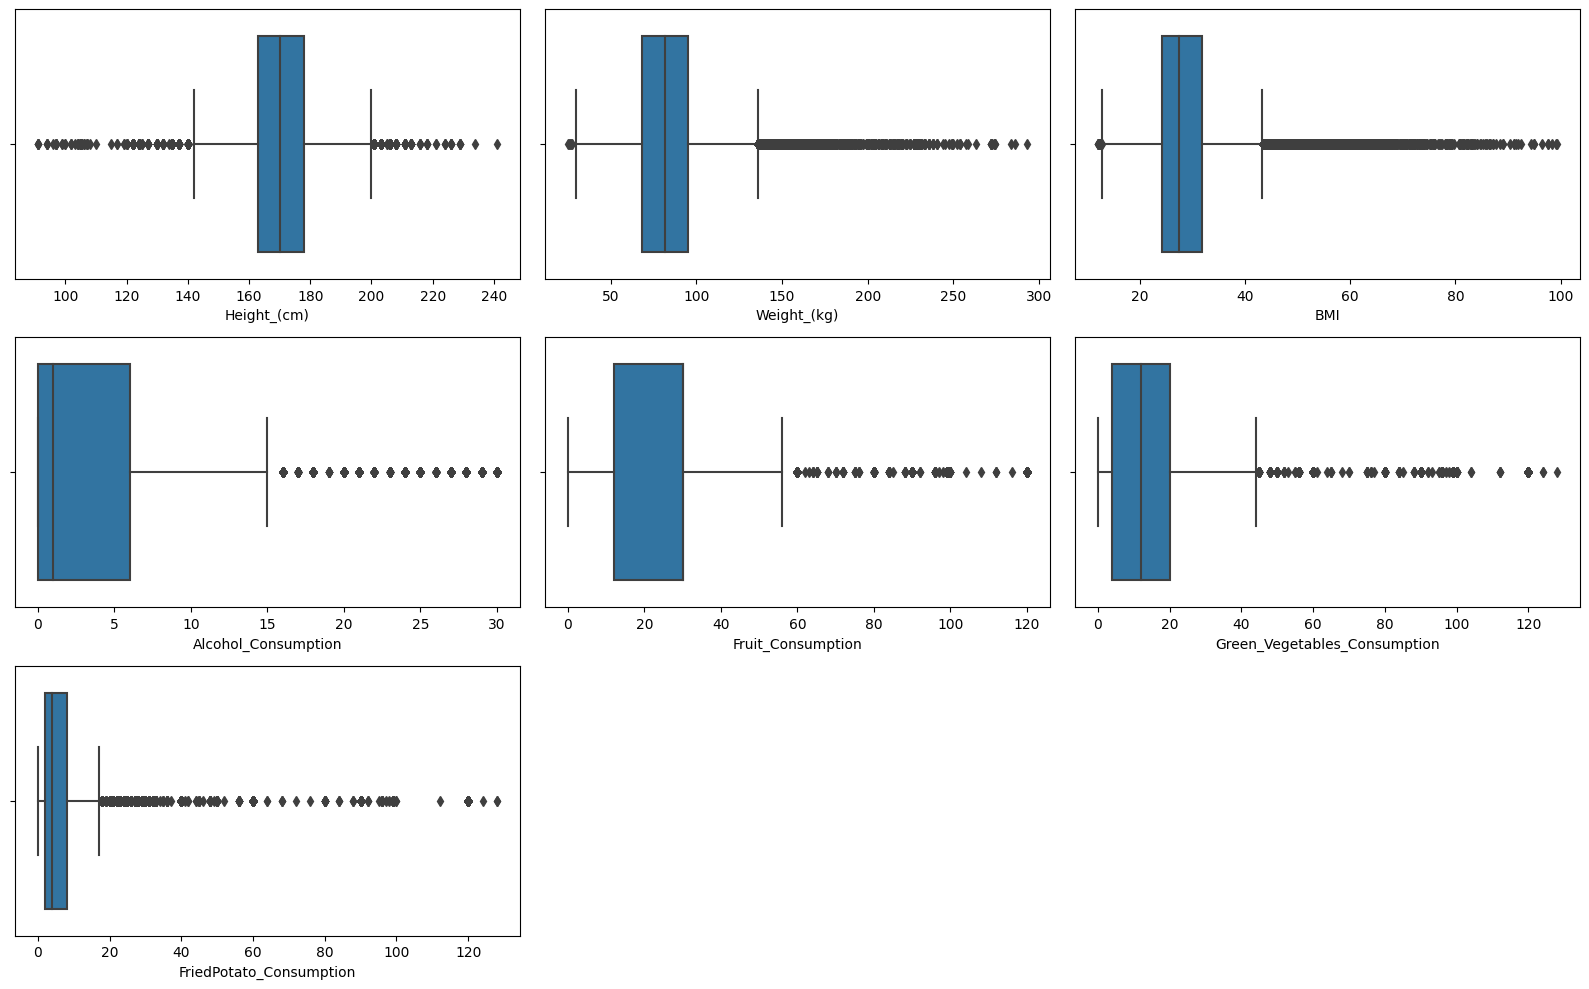

In [23]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])

plt.tight_layout()

Hitung duplikat

In [24]:
duplicate_count = df.duplicated().sum()

# Print the count
print("Jumlah duplikat:", duplicate_count)

Jumlah duplikat: 80


Hapus baris duplikat

In [25]:
df = df.drop_duplicates()

### Splitting Dataset

In [26]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2, random_state=22, stratify=df['Heart_Disease'])

print(train.shape)
print(test.shape)

(247019, 19)
(61755, 19)


In [27]:
## train set
X_train = train.drop("Heart_Disease", axis=1)
y_train = train["Heart_Disease"].copy()

## test set
X_test = test.drop("Heart_Disease", axis=1)
y_test = test["Heart_Disease"].copy()

In [28]:
X_train.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       97
Weight_(kg)                      505
BMI                             3504
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 74
Green_Vegetables_Consumption      71
FriedPotato_Consumption           63
dtype: int64

### Membuat Pipeline

In [29]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

Kategorikal pipeline

In [30]:
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

Numerikal pipeline

In [31]:
num_pipeline = make_pipeline(FunctionTransformer(np.log1p,feature_names_out='one-to-one'),StandardScaler())

Age Category Pipeline, General Health Pipeline dan Checkup Pipeline

In [32]:
agecat_pipeline = make_pipeline(OrdinalEncoder())

genhealth_pipeline = make_pipeline(OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']]))

checkup_pipeline = make_pipeline(OrdinalEncoder(categories=[['Within the past year','Within the past 2 years',
                                                             'Within the past 5 years','5 or more years ago','Never']]))

Setting tiap column ke pipeline yang akan digunakan

In [33]:
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']

Menggabungkan semua pipelines dan membuat pipeline utama untuk memasukkan semua data

In [34]:
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age_Category',agecat_pipeline,['Age_Category']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('Gen_health',genhealth_pipeline,['General_Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Arthritis', 'Depression', 'Diabetes',
                                  'Exercise', 'Other_Cancer', 'Sex',
                                  'Skin_Cancer', 'Smoking_History']),
                                ('Age_Category',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Age_Category']),...
                                                                              'Excellent']]))]),
                                 ['General_Health']),
                                ('Numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])

# Modeling

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [36]:
models = {
    'AdaBoost':AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    'DecisionTree':DecisionTreeClassifier(random_state=22),
    'KNN':KNeighborsClassifier(n_neighbors=3),
    'LogisticRegression':LogisticRegression(max_iter=10000,random_state=22),
    'LGBM':LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.1, random_state=42),
    'RandomForest':RandomForestClassifier(n_estimators=100,random_state=22)
}

### Model training

Penggunaan SMOTE untuk menangani imbalance

In [37]:
AB_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['AdaBoost'])
AB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [38]:
DT_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['DecisionTree'])
DT_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=22))])

In [39]:
KNN_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['KNN'])
KNN_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [40]:
LR_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['LogisticRegression'])
LR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, random_state=22))])

In [41]:
LGBM_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['LGBM'])
LGBM_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [42]:
RF_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), models['RandomForest'])
RF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Arthritis', 'Depression',
                                                   'Diabetes', 'Exercise',
                                                   'Other_Cancer', 'Sex',
                                                   'Skin_Cancer',
                                                   'Smoking_History']),
                                                 ('Age_Category',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   O...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=22)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=22))])

# Evaluasi

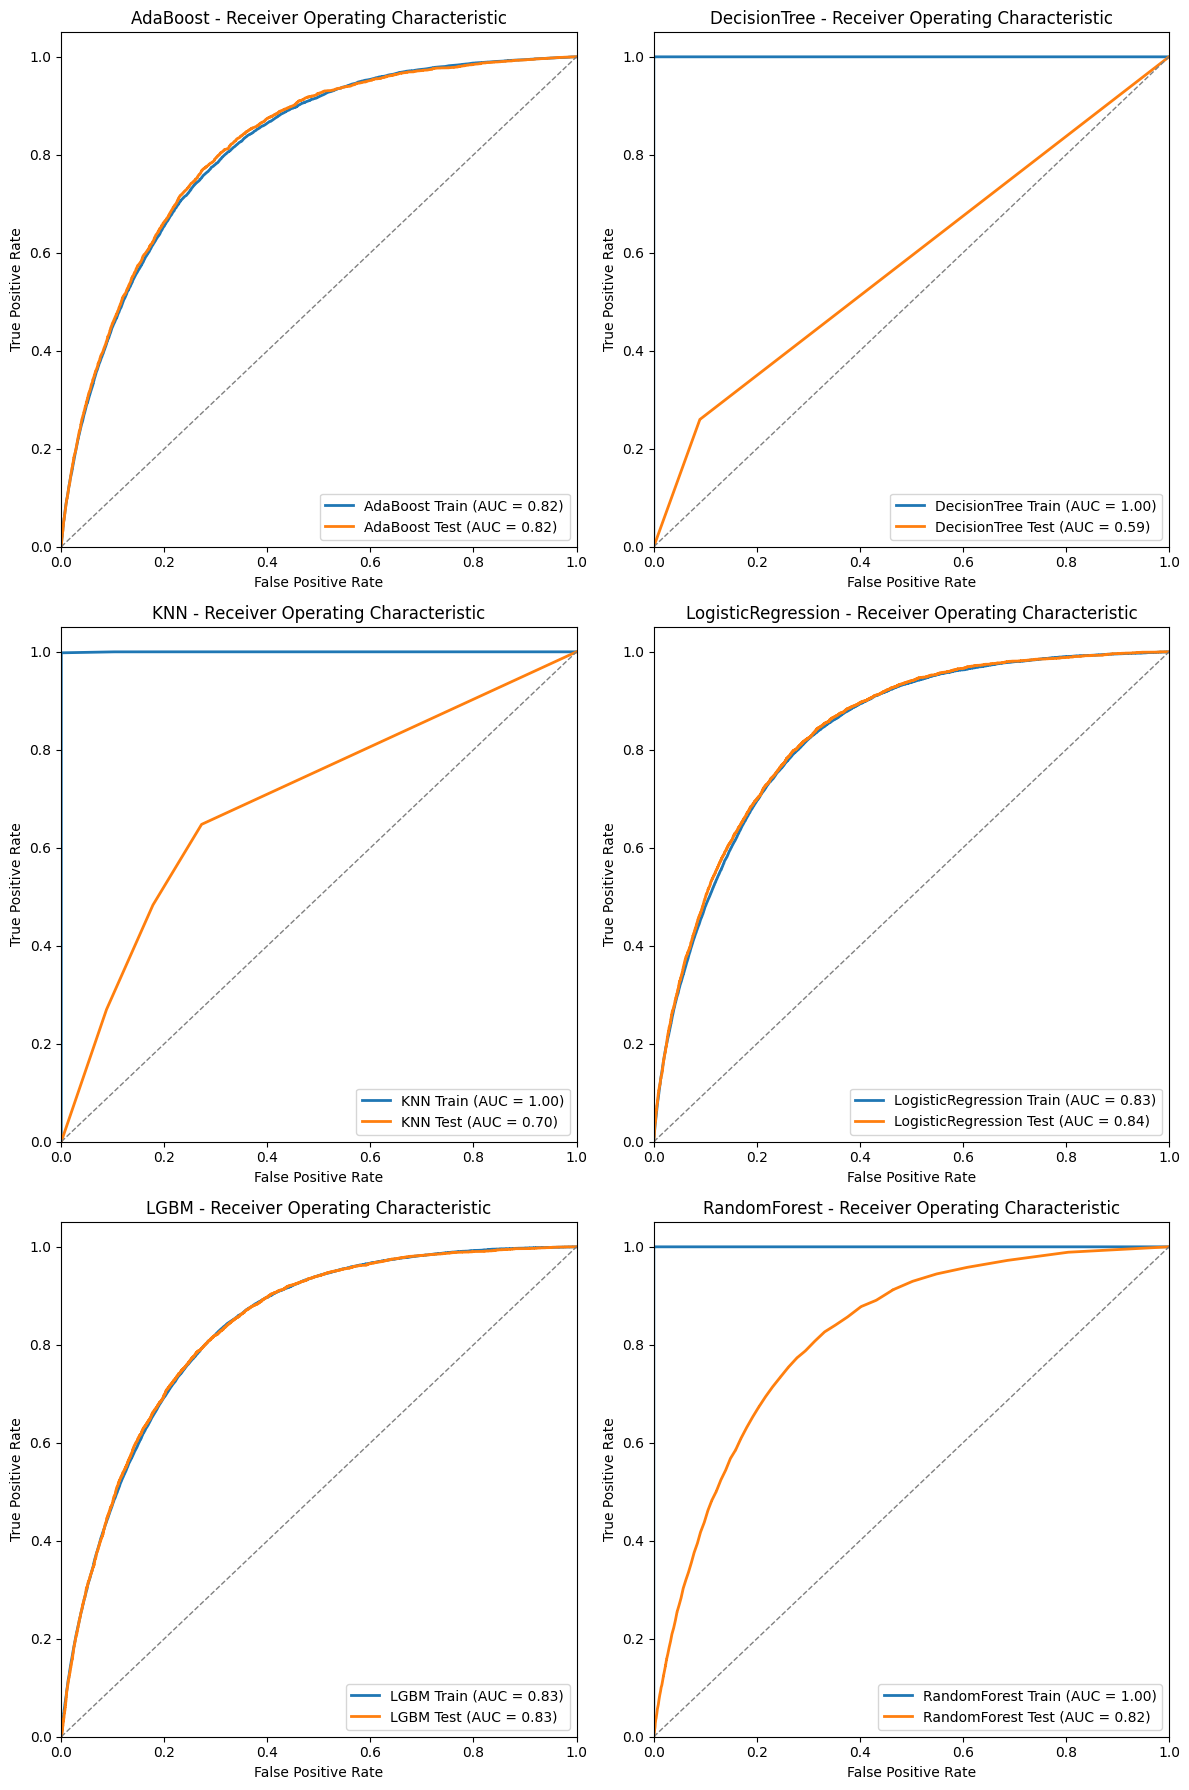

In [43]:
from sklearn.metrics import roc_curve, auc

# Calculate the number of rows and columns for subplots
num_models = len(models)
num_rows = (num_models + 1) // 2  # Add 1 to ensure at least one row for odd numbers of models
num_cols = 2

# Create a single figure with subplots for ROC curves of each model
plt.figure(figsize=(12, 6 * num_rows))

# Iterate over each model and create a subplot for ROC curve
for idx, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(num_rows, num_cols, idx)

    model_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), model)
    model_pipeline.fit(X_train, y_train)

    # Buat prediksi probabilitas pada label positif (class 1)
    y_score_train = model_pipeline.predict_proba(X_train)[:, 1]
    y_score_test = model_pipeline.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC for train
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Compute ROC curve and AUC for test
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve for train and test on the same subplot
    plt.plot(fpr_train, tpr_train, lw=2, label=f'{name} Train (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, lw=2, label=f'{name} Test (AUC = {roc_auc_test:.2f})')

    # Plot the random guessing ROC curve (diagonal line)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set plot properties for each subplot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Receiver Operating Characteristic')
    plt.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
reports = []

for name, model in models.items():
    model_pipeline = make_pipeline(preprocessing, SMOTE(random_state=22), model)
    model_pipeline.fit(X_train, y_train)

    # Buat prediksi pada label
    prediction = model_pipeline.predict(X_test)

    # Hitung classification report
    report_str = classification_report(y_test, prediction)

    # Tambahkan classification report ke dalam list
    reports.append(report_str)

# Buat DataFrame untuk classification reports
report_df = pd.DataFrame({'Model': list(models.keys()),'Classification Report': reports})
report_df.to_csv('classification_reports.csv', index=False)

In [45]:
# Print classification report
for idx, row in report_df.iterrows():
    print('-----------------------------------------------------')
    print(f"Classification Report untuk {row['Model']}:")
    print(row['Classification Report'])

-----------------------------------------------------
Classification Report untuk AdaBoost:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     56761
           1       0.25      0.59      0.35      4994

    accuracy                           0.82     61755
   macro avg       0.60      0.72      0.62     61755
weighted avg       0.90      0.82      0.85     61755

-----------------------------------------------------
Classification Report untuk DecisionTree:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56761
           1       0.20      0.26      0.23      4994

    accuracy                           0.86     61755
   macro avg       0.57      0.59      0.57     61755
weighted avg       0.87      0.86      0.87     61755

-----------------------------------------------------
Classification Report untuk KNN:
              precision    recall  f1-score   support

           0    